## Killariben Limbachiya

# **Modern NLP Approach - Extractive Summarization**

# Load The Dataset

In [8]:
# Mount Google Drive (if using Colab)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load cleaned dataset
input_path = "/content/drive/My Drive/NLP/Assignment_3/fomc_transcripts_spacy_cleaned.csv"
df = pd.read_csv(input_path)
df['Date'] = pd.to_datetime(df['Date'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df

,URL,Date,Year,Month,Day,Content,date,GDP,CPI,Unemployment,FedFundsRate,SNR_Ratio,StopWord_Ratio,Redundancy_Ratio,SpecialChar_Density,Semantic_Density,Digit_Ratio,Noise_Score,Quality_Score,cleaned_text
0,https://www.federalreserve.gov/monetarypolicy/...,2025-03-19,2025,2025-03-01,19,HomeMonetary PolicyFederal Open Market Committ...,2025-03-31,-0.3,319.615,4.2,4.33,0.279155,0.354400,0.720845,0.022419,0.408555,0.005835,0.382654,0.305056,HomeMonetary PolicyFederal Open Market Committ...
1,https://www.federalreserve.gov/monetarypolicy/...,2025-01-29,2025,2025-01-01,29,HomeMonetary PolicyFederal Open Market Committ...,2025-01-31,-0.3,319.086,4.0,4.33,0.274118,0.350613,0.725882,0.022663,0.406096,0.006524,0.379800,0.300413,HomeMonetary PolicyFederal Open Market Committ...
2,https://www.federalreserve.gov/monetarypolicy/...,2024-12-18,2024,2024-12-01,18,HomeMonetary PolicyFederal Open Market Committ...,2024-12-31,2.4,317.603,4.1,4.48,0.276134,0.353011,0.723866,0.023393,0.410266,0.006981,0.383385,0.303015,HomeMonetary PolicyFederal Open Market Committ...
3,https://www.federalreserve.gov/monetarypolicy/...,2024-11-07,2024,2024-11-01,7,HomeMonetary PolicyFederal Open Market Committ...,2024-11-30,2.4,316.449,4.2,4.64,0.283448,0.348729,0.716552,0.023180,0.412021,0.005405,0.377315,0.318154,HomeMonetary PolicyFederal Open Market Committ...
4,https://www.federalreserve.gov/monetarypolicy/...,2024-09-18,2024,2024-09-01,18,HomeMonetary PolicyFederal Open Market Committ...,2024-09-30,3.1,314.851,4.1,5.13,0.271982,0.360516,0.728018,0.022806,0.405455,0.006638,0.389960,0.287477,HomeMonetary PolicyFederal Open Market Committ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,https://www.federalreserve.gov/monetarypolicy/...,2015-07-29,2015,2015-07-01,29,HomeMonetary PolicyFederal Open Market Committ...,2015-07-31,1.6,238.034,5.2,0.13,0.245457,0.370972,0.754543,0.019337,0.437587,0.003586,0.393894,0.289149,HomeMonetary PolicyFederal Open Market Committ...
62,https://www.federalreserve.gov/monetarypolicy/...,2015-06-17,2015,2015-06-01,17,HomeMonetary PolicyFederal Open Market Committ...,2015-06-30,2.5,237.657,5.3,0.13,0.250569,0.369906,0.749431,0.020540,0.426146,0.004592,0.395038,0.281677,HomeMonetary PolicyFederal Open Market Committ...
63,https://www.federalreserve.gov/monetarypolicy/...,2015-04-29,2015,2015-04-01,29,HomeMonetary PolicyFederal Open Market Committ...,2015-04-30,2.5,236.222,5.4,0.12,0.245321,0.366635,0.754679,0.021650,0.434374,0.004041,0.392326,0.287369,HomeMonetary PolicyFederal Open Market Committ...
64,https://www.federalreserve.gov/monetarypolicy/...,2015-03-18,2015,2015-03-01,18,HomeMonetary PolicyFederal Open Market Committ...,2015-03-31,3.6,235.976,5.4,0.11,0.246890,0.385526,0.753110,0.020051,0.423729,0.004569,0.410146,0.260472,HomeMonetary PolicyFederal Open Market Committ...


In [3]:
# Show summary info, including dtypes and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   URL                  66 non-null     object        
 1   Date                 66 non-null     datetime64[ns]
 2   Year                 66 non-null     int64         
 3   Month                66 non-null     object        
 4   Day                  66 non-null     int64         
 5   Content              66 non-null     object        
 6   date                 66 non-null     object        
 7   GDP                  66 non-null     float64       
 8   CPI                  66 non-null     float64       
 9   Unemployment         66 non-null     float64       
 10  FedFundsRate         66 non-null     float64       
 11  SNR_Ratio            66 non-null     float64       
 12  StopWord_Ratio       66 non-null     float64       
 13  Redundancy_Ratio     66 non-null     

#Sorting the Date and Index

In [4]:
import pandas as pd

# 1) Convert the 'Date' column from object (string) to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 2) (Optional) Drop or inspect rows where conversion failed
# print(df[df['Date'].isna()])

# 3) Sort the DataFrame by the new datetime 'Date' column in descending order
df = df.sort_values(by='Date', ascending=False)

# 4) (Optional) Reset index if you want a clean integer index
df = df.reset_index(drop=True)

# Now df['Date'] is a datetime dtype and the rows are sorted newest → oldest
#print(df[['doc_id', 'Date']].head())


In [5]:
# 1) Make sure your index is reset 0…N‑1
df = df.reset_index(drop=True)

# 2) Rebuild doc_id as "doc1", "doc2", … up to "docN"
df['doc_id'] = 'doc' + (df.index + 1).astype(str)

# 3) Check
print(df[['doc_id', 'Date']].head())


  doc_id       Date
0   doc1 2025-03-19
1   doc2 2025-01-29
2   doc3 2024-12-18
3   doc4 2024-11-07
4   doc5 2024-09-18


In [6]:
import spacy
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# 1) Load spaCy model for sentence splitting
nlp = spacy.load("en_core_web_sm")

# 2) Build analysis DataFrame with text and Date columns
df_analysis = pd.DataFrame({
    "text": df["cleaned_text"],
    "Date": pd.to_datetime(df["Date"]).dt.date  # convert to date only
})

# 3) Function to compute sentence, word, token, and chunk metrics
def compute_bert_metrics(text):
    doc = nlp(text)
    total_sentences = len(list(doc.sents))
    total_words     = sum(len([t for t in sent if not t.is_space]) for sent in doc.sents)
    bert_tokens     = total_words * 0.75
    bert_chunks_450 = int(np.ceil(bert_tokens / 450))
    return total_sentences, total_words, round(bert_tokens, 1), bert_chunks_450

# 4) Apply metrics function and expand into separate columns
df_analysis[
    ["total_sentences", "total_words", "bert_tokens", "bert_chunks_450"]
] = pd.DataFrame(
    df_analysis["text"]
        .apply(compute_bert_metrics)
        .tolist(),
    index=df_analysis.index
)

# 5) Prepare heatmap data
metrics  = ["total_sentences", "total_words", "bert_tokens", "bert_chunks_450"]
z        = df_analysis[metrics].values
z_text   = [[str(val) for val in row] for row in z]
x_labels = metrics
y_labels = [f"Doc {i+1} ({date})" for i, date in enumerate(df_analysis["Date"])]

# 6) Build and display the heatmap with values and clean dates
fig = go.Figure(data=go.Heatmap(
    z=z,
    x=x_labels,
    y=y_labels,
    text=z_text,                # display each cell's value
    texttemplate="%{text}",     # template for cell text
    colorscale="Viridis",
    colorbar=dict(title="Value")
))

# 7) Reverse y-axis so that Doc1 appears at the top
fig.update_yaxes(autorange="reversed")

# 8) Layout tweaks
fig.update_layout(
    title="📊 BERT-Based Document Metrics",
    xaxis_title="Metrics",
    yaxis_title="Document (Date)",
    height=600,
    width=800,
    margin=dict(l=150)  # make space for longer y-labels
)

fig.show()


In [7]:
df

,URL,Date,Year,Month,Day,Content,date,GDP,CPI,Unemployment,...,SNR_Ratio,StopWord_Ratio,Redundancy_Ratio,SpecialChar_Density,Semantic_Density,Digit_Ratio,Noise_Score,Quality_Score,cleaned_text,doc_id
0,https://www.federalreserve.gov/monetarypolicy/...,2025-03-19,2025,2025-03-01,19,HomeMonetary PolicyFederal Open Market Committ...,2025-03-31,-0.3,319.615,4.2,...,0.279155,0.354400,0.720845,0.022419,0.408555,0.005835,0.382654,0.305056,HomeMonetary PolicyFederal Open Market Committ...,doc1
1,https://www.federalreserve.gov/monetarypolicy/...,2025-01-29,2025,2025-01-01,29,HomeMonetary PolicyFederal Open Market Committ...,2025-01-31,-0.3,319.086,4.0,...,0.274118,0.350613,0.725882,0.022663,0.406096,0.006524,0.379800,0.300413,HomeMonetary PolicyFederal Open Market Committ...,doc2
2,https://www.federalreserve.gov/monetarypolicy/...,2024-12-18,2024,2024-12-01,18,HomeMonetary PolicyFederal Open Market Committ...,2024-12-31,2.4,317.603,4.1,...,0.276134,0.353011,0.723866,0.023393,0.410266,0.006981,0.383385,0.303015,HomeMonetary PolicyFederal Open Market Committ...,doc3
3,https://www.federalreserve.gov/monetarypolicy/...,2024-11-07,2024,2024-11-01,7,HomeMonetary PolicyFederal Open Market Committ...,2024-11-30,2.4,316.449,4.2,...,0.283448,0.348729,0.716552,0.023180,0.412021,0.005405,0.377315,0.318154,HomeMonetary PolicyFederal Open Market Committ...,doc4
4,https://www.federalreserve.gov/monetarypolicy/...,2024-09-18,2024,2024-09-01,18,HomeMonetary PolicyFederal Open Market Committ...,2024-09-30,3.1,314.851,4.1,...,0.271982,0.360516,0.728018,0.022806,0.405455,0.006638,0.389960,0.287477,HomeMonetary PolicyFederal Open Market Committ...,doc5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,https://www.federalreserve.gov/monetarypolicy/...,2015-07-29,2015,2015-07-01,29,HomeMonetary PolicyFederal Open Market Committ...,2015-07-31,1.6,238.034,5.2,...,0.245457,0.370972,0.754543,0.019337,0.437587,0.003586,0.393894,0.289149,HomeMonetary PolicyFederal Open Market Committ...,doc62
62,https://www.federalreserve.gov/monetarypolicy/...,2015-06-17,2015,2015-06-01,17,HomeMonetary PolicyFederal Open Market Committ...,2015-06-30,2.5,237.657,5.3,...,0.250569,0.369906,0.749431,0.020540,0.426146,0.004592,0.395038,0.281677,HomeMonetary PolicyFederal Open Market Committ...,doc63
63,https://www.federalreserve.gov/monetarypolicy/...,2015-04-29,2015,2015-04-01,29,HomeMonetary PolicyFederal Open Market Committ...,2015-04-30,2.5,236.222,5.4,...,0.245321,0.366635,0.754679,0.021650,0.434374,0.004041,0.392326,0.287369,HomeMonetary PolicyFederal Open Market Committ...,doc64
64,https://www.federalreserve.gov/monetarypolicy/...,2015-03-18,2015,2015-03-01,18,HomeMonetary PolicyFederal Open Market Committ...,2015-03-31,3.6,235.976,5.4,...,0.246890,0.385526,0.753110,0.020051,0.423729,0.004569,0.410146,0.260472,HomeMonetary PolicyFederal Open Market Committ...,doc65


In [8]:
!pip install --upgrade transformers

In [9]:
import transformers
print(transformers.__version__)

4.51.3


In [10]:
!pip install --upgrade spacy

In [11]:
nlp = spacy.load("en_core_web_sm")

In [12]:
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [13]:
# # STEP 1: UNINSTALL OLD VERSIONS (if needed)
# !pip uninstall -y torch torchvision

# # STEP 2: INSTALL STABLE COMPATIBLE VERSIONS
# !pip install torch==2.1.0 torchvision==0.16.0

#Loading the model and the tokenizer

In [14]:
# 🚨 Force reinstall PyTorch & NumPy without cache to fix compatibility
!pip install --force-reinstall --no-cache-dir torch==2.1.0 torchvision==0.16.0 numpy==1.26.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 185.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 121.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 203.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 245.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 211.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 291.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 225.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 252.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# ──────────────────────────────────────────────────────────────────────────────
# Block 0: Imports & Model Loading (yiyanghkust/finbert-tone)
# ──────────────────────────────────────────────────────────────────────────────
import spacy
import torch
from transformers import AutoTokenizer, AutoModel

# 1) spaCy for sentence splitting
nlp = spacy.load("en_core_web_sm")

# 2) FinBERT‑Tone for financial‑domain embeddings
TOKENIZER = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
FINBERT    = AutoModel.from_pretrained("yiyanghkust/finbert-tone")

# 3) Device setup
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
FINBERT.to(DEVICE).eval()




pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30873, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [2]:
# ──────────────────────────────────────────────────────────────────────────────
# Block 1: Chunking into ~450‑token windows with 100‑token overlap
# ──────────────────────────────────────────────────────────────────────────────
def chunk_text(text, max_tokens=450, overlap=100):
    doc = nlp(text)
    sents = [sent.text.strip() for sent in doc.sents]

    chunks = []
    curr, curr_count = [], 0

    for sent in sents:
        toks = TOKENIZER.tokenize(sent)
        n = len(toks)
        # if adding this sentence would overflow, finalize current chunk
        if curr_count + n > max_tokens:
            chunks.append(" ".join(curr))
            # build overlap window
            overlap_sents, count = [], 0
            for prev in reversed(curr):
                ptoks = TOKENIZER.tokenize(prev)
                if count + len(ptoks) > overlap:
                    break
                overlap_sents.insert(0, prev)
                count += len(ptoks)
            curr, curr_count = overlap_sents, count

        curr.append(sent)
        curr_count += n

    if curr:
        chunks.append(" ".join(curr))
    return chunks


In [3]:
# ──────────────────────────────────────────────────────────────────────────────
# Block 2: Extract unique sentences from all chunks
# ──────────────────────────────────────────────────────────────────────────────
def sentences_from_chunks(chunks):
    seen = set()
    sentences = []
    for chunk in chunks:
        for sent in nlp(chunk).sents:
            t = sent.text.strip()
            if t not in seen:
                seen.add(t)
                sentences.append(t)
    return sentences


In [4]:
# ──────────────────────────────────────────────────────────────────────────────
# Block 3: Get [CLS] embeddings via FinBERT
# ──────────────────────────────────────────────────────────────────────────────
@torch.no_grad()
def embed_sentences(sent_list):
    embs = []
    for s in sent_list:
        inputs = TOKENIZER(
            s,
            return_tensors="pt",
            truncation=True,
            padding="max_length",
            max_length=512
        ).to(DEVICE)
        out = FINBERT(**inputs)
        cls = out.last_hidden_state[:, 0, :].cpu().numpy()
        embs.append(cls.squeeze(0))
    return np.vstack(embs)


In [5]:
# ──────────────────────────────────────────────────────────────────────────────
# Block 4: MMR‐based selection up to ~1500 tokens
# ──────────────────────────────────────────────────────────────────────────────
from sklearn.metrics.pairwise import cosine_similarity

def mmr_summary(sents, embs, doc_emb, max_tokens=1500, lam=0.6):
    selected, sel_embs, used = [], [], set()
    cur_toks = 0
    doc_sim = cosine_similarity(embs, doc_emb.reshape(1, -1)).flatten()

    while used != set(range(len(sents))) and cur_toks < max_tokens:
        scores = {}
        for idx in set(range(len(sents))) - used:
            rel = doc_sim[idx]
            div = max(cosine_similarity(
                embs[idx:idx+1],
                np.vstack(sel_embs) if sel_embs else embs[idx:idx+1]
            ).flatten()) if sel_embs else 0.0
            scores[idx] = lam * rel - (1 - lam) * div

        best = max(scores, key=scores.get)
        tok_len = len(TOKENIZER.tokenize(sents[best]))
        if cur_toks + tok_len > max_tokens:
            break

        selected.append(sents[best])
        sel_embs.append(embs[best])
        used.add(best)
        cur_toks += tok_len

    return " ".join(selected)


In [ ]:
# # ⛔ Force restart-safe installation to fix NumPy incompatibility
# !pip install --force-reinstall --no-cache-dir numpy==1.26.4

In [6]:
import numpy as np
print(np.__version__)
np.array([1, 2, 3])


1.26.4


array([1, 2, 3])

In [9]:
# ──────────────────────────────────────────────────────────────────────────────
# Block 5: Full pipeline and store in df["summary"]
# ──────────────────────────────────────────────────────────────────────────────
import numpy as np

def summarize(text):
    chunks   = chunk_text(text)
    sents    = sentences_from_chunks(chunks)
    embs     = embed_sentences(sents)
    doc_emb  = embs.mean(axis=0)
    return mmr_summary(sents, embs, doc_emb)

# apply to your DataFrame
df["summary"] = df["cleaned_text"].apply(summarize)


In [10]:
df.sample(2)

,URL,Date,Year,Month,Day,Content,date,GDP,CPI,Unemployment,...,SNR_Ratio,StopWord_Ratio,Redundancy_Ratio,SpecialChar_Density,Semantic_Density,Digit_Ratio,Noise_Score,Quality_Score,cleaned_text,summary
46,https://www.federalreserve.gov/monetarypolicy/...,2017-06-14,2017,2017-06-01,14,HomeMonetary PolicyFederal Open Market Committ...,2017-06-30,2.3,244.163,4.3,...,0.236939,0.373093,0.763061,0.021438,0.412804,0.006895,0.401426,0.248317,HomeMonetary PolicyFederal Open Market Committ...,Survey results and market pricing suggested th...
14,https://www.federalreserve.gov/monetarypolicy/...,2023-06-14,2023,2023-06-01,14,HomeMonetary PolicyFederal Open Market Committ...,2023-06-30,2.4,304.099,3.6,...,0.265368,0.357864,0.734632,0.021659,0.420312,0.005515,0.385039,0.300641,HomeMonetary PolicyFederal Open Market Committ...,The unemployment rate was forecast to increase...


In [11]:
# Assuming df is your DataFrame
df.to_csv('/content/drive/My Drive/NLP/Assignment_3/fomc_summary.csv', index=False)

In [17]:
print(df.columns)


Index(['URL', 'Date', 'Year', 'Month', 'Day', 'Content', 'date', 'GDP', 'CPI',
       'Unemployment', 'FedFundsRate', 'SNR_Ratio', 'StopWord_Ratio',
       'Redundancy_Ratio', 'SpecialChar_Density', 'Semantic_Density',
       'Digit_Ratio', 'Noise_Score', 'Quality_Score', 'cleaned_text',
       'summary'],
      dtype='object')


In [20]:
df = df.reset_index(drop=True)  # Optional: ensure clean indexing
df['doc_id'] = 'doc' + (df.index + 1).astype(str)
print(df[['doc_id', 'Date']].head())

  doc_id       Date
0   doc1 2025-03-19
1   doc2 2025-01-29
2   doc3 2024-12-18
3   doc4 2024-11-07
4   doc5 2024-09-18


# Evaluate Summary Quality & Information Retention

BERTScore (semantic similarity)

In [21]:
# !pip install bert-score

from bert_score import score

# Sample a few rows for demonstration (optional)
sample_df = df.sample(5, random_state=42)

# Compute BERTScore (reference: full text, candidate: summary)
P, R, F1 = score(cands=sample_df['summary'].tolist(),
                 refs=sample_df['cleaned_text'].tolist(),
                 lang="en", model_type="bert-base-uncased")

# Attach to DataFrame
sample_df['BERT_Precision'] = P.tolist()
sample_df['BERT_Recall'] = R.tolist()
sample_df['BERT_F1'] = F1.tolist()

# Reset index of sample_df to make 'doc_id' a column
sample_df = sample_df.reset_index()

# View scores
sample_df[['doc_id', 'BERT_Precision', 'BERT_Recall', 'BERT_F1']]


,doc_id,BERT_Precision,BERT_Recall,BERT_F1
0,doc55,0.431291,0.412553,0.421714
1,doc63,0.447369,0.431908,0.439503
2,doc1,0.583355,0.584023,0.583689
3,doc46,0.431035,0.415864,0.423314
4,doc6,0.635131,0.621832,0.628411


# Compare Summaries Over Time

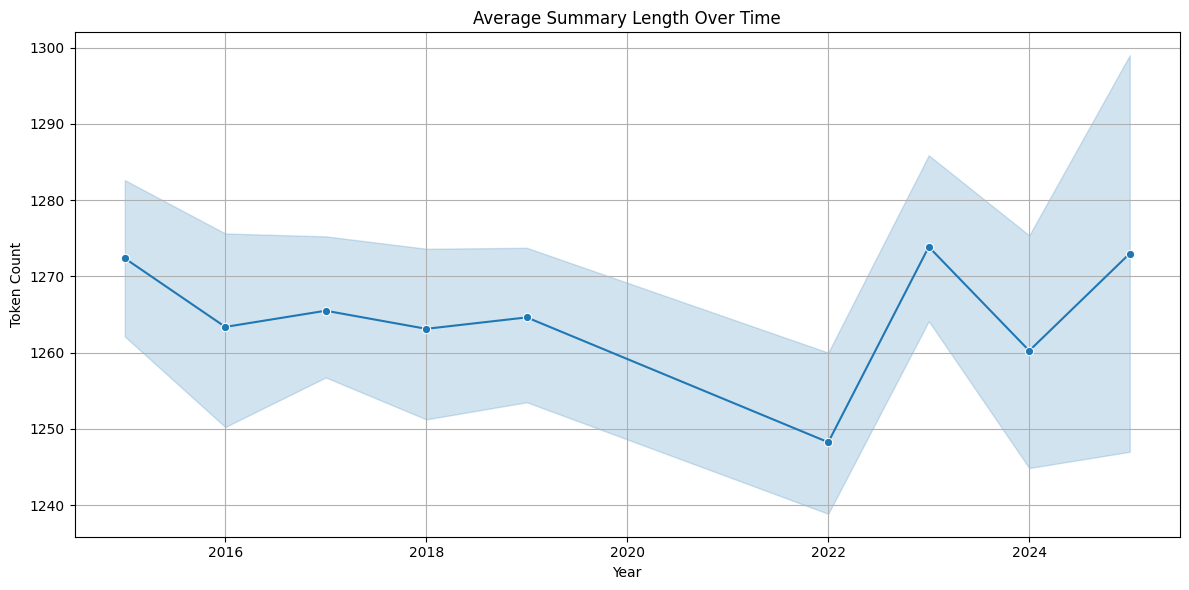

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['summary_length'] = df['summary'].str.split().str.len()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='summary_length', marker='o')
plt.title("Average Summary Length Over Time")
plt.ylabel("Token Count")
plt.grid(True)
plt.tight_layout()
plt.show()


Word Cloud of Summaries by Year

In [23]:
from wordcloud import WordCloud

years = sorted(df['Year'].dropna().unique())
ncols = 3
nrows = (len(years) + ncols - 1) // ncols

plt.figure(figsize=(20, 5 * nrows))

for i, year in enumerate(years):
    year_text = ' '.join(df[df['Year'] == year]['summary'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(year_text)

    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - Summary - {year}')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.